In [4]:
import deepwalk

In [5]:
help(deepwalk)

Help on package deepwalk:

NAME
    deepwalk - # -*- coding: utf-8 -*-

PACKAGE CONTENTS
    __main__
    graph
    skipgram
    walks

DATA
    __email__ = 'bperozzi@cs.stonybrook.edu'

VERSION
    1.0.0

AUTHOR
    Bryan Perozzi

FILE
    c:\users\gao\appdata\local\continuum\anaconda3\envs\tf-gpu\lib\site-packages\deepwalk\__init__.py




In [9]:
from deepwalk import graph

In [16]:
#help(graph)

In [10]:
from deepwalk import skipgram

C:\Users\GAO\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [17]:
#help(skipgram)

In [14]:
from deepwalk import walks

In [18]:
#help(walks)

In [1]:
import numpy as np
import random
import networkx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from gensim.models import Word2Vec

C:\Users\GAO\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
def relu(x):
    return np.maximum(0, x)

In [11]:
def get_edge_probability(G,start,end,p,q):
    unnormalized_probability=[]
    for end_neighbors in sorted(G.neighbors(end)):
        if end_neighbors==start:
            unnormalized_probability.append(1/p)
        elif G.has_edge(end_neighbors,start):
            unnormalized_probability.append(1)
        else:
            unnormalized_probability.append(1/q)
    normalized_probability=[float(x)/sum(unnormalized_probability) for x in unnormalized_probability]
    return normalized_probability

In [12]:
def getAlledgesProbability(G,p,q, undirected=True):
    AlledgesProbability={}
    for edge in G.edges():
        AlledgesProbability[edge]=get_edge_probability(G,edge[0],edge[1],p,q)
        if undirected:
            AlledgesProbability[(edge[1],edge[0])]=get_egde_probability(G,edge[1],edge[0],p,q)
    return AlledgesProbability

In [13]:
def random_walk(G,walk_length,start_point,p,q):
    AlledgesProbability=getAlledgesProbability(G,p,q)
    walk=[start_point]
    while len(walk) <walk_length:
        current=walk[-1]
        neighbors=sorted(G.neighbors(current))
        if len(neighbors)>0:
            if len(walk)==1:
                next=np.random.choice(neighbors,size=1,p=[1/len(neighbors)]*len(neighbors))[0]
                walk.append(next)
            else:
                previous=walk[-2]
                next=np.random.choice(neighbors,size=1,p=AlledgesProbability[(previous, current)])[0]
                walk.append(next)
        else:
            break
    return walk

In [14]:
def simulate_walk(G, number_walk, walk_length,p,q):
    walk=[]
    nodes=list(G.nodes())
    for i in range(number_walk):
        random.shuffle(nodes)
        for node in nodes:
            walk.append(random_walk(G,walk_length, node, p,q))
    return walk

In [15]:
G=networkx.karate_club_graph()

In [16]:
def clustering(H):
    edges= networkx.edge_betweenness_centrality(H,normalized=True)
    mx=max(edges.values())
    for i in sorted(edges.keys()):
        if edges[i]==mx:
            return i

In [17]:
split=list(networkx.algorithms.community.centrality.girvan_newman(G, most_valuable_edge=clustering))

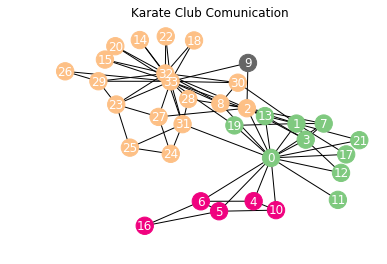

In [18]:
split_number=2##times?
color_map={}
for i in range(len(split[2])):
    for node in list(split[2][i]):
        color_map[node]=i/len(split[2])
values=[color_map.get(node,0.25) for node in G.node]
plt.title('Karate Club Comunication ')
networkx.draw(G,cmap=plt.get_cmap('Accent'),node_color=values,with_labels=True,font_color='white')
plt.show()

In [25]:
get_edge_probability(G, 15, 30, p=1, q=2)

[0.16666666666666666,
 0.16666666666666666,
 0.3333333333333333,
 0.3333333333333333]

In [3]:
from networkx import karate_club_graph, to_numpy_matrix
zkc = karate_club_graph()
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [4]:
W_1 = np.random.normal(
    loc=0, scale=1, size=(zkc.number_of_nodes(), 4))
W_2 = np.random.normal(
    loc=0, size=(W_1.shape[1], 2))

In [5]:
import numpy as np

In [6]:
def gcn_layer(A_hat, D_hat, X, W):
    return np.maximum(D_hat**-1 * A_hat * X * W, 0)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

In [7]:
feature_representations = {
    node: np.array(output)[node] 
    for node in zkc.nodes()}

In [8]:
feature_representations

{0: array([0.        , 0.07963494]),
 1: array([0.        , 0.03424406]),
 2: array([0.11189808, 0.        ]),
 3: array([0.09687548, 0.        ]),
 4: array([0.       , 0.1390064]),
 5: array([0.        , 0.15659448]),
 6: array([0.        , 0.12741695]),
 7: array([0.07898383, 0.        ]),
 8: array([0.12199453, 0.        ]),
 9: array([0.1772392, 0.       ]),
 10: array([0.        , 0.14262389]),
 11: array([0.        , 0.16827804]),
 12: array([0.        , 0.02194154]),
 13: array([0.1497214, 0.       ]),
 14: array([0.06044642, 0.        ]),
 15: array([0.04080911, 0.        ]),
 16: array([0.        , 0.17386136]),
 17: array([0.        , 0.08412764]),
 18: array([0.03626071, 0.        ]),
 19: array([0.        , 0.05760528]),
 20: array([0., 0.]),
 21: array([0.        , 0.04072298]),
 22: array([0., 0.]),
 23: array([0.        , 0.05019771]),
 24: array([0.        , 0.09460831]),
 25: array([0.        , 0.07201352]),
 26: array([0.17605958, 0.        ]),
 27: array([0.        

In [9]:
feature_representations = np.array(list(feature_representations.values()))

In [10]:
feature_representations.shape

(34, 2)

In [11]:
feature_representations

array([[0.        , 0.07963494],
       [0.        , 0.03424406],
       [0.11189808, 0.        ],
       [0.09687548, 0.        ],
       [0.        , 0.1390064 ],
       [0.        , 0.15659448],
       [0.        , 0.12741695],
       [0.07898383, 0.        ],
       [0.12199453, 0.        ],
       [0.1772392 , 0.        ],
       [0.        , 0.14262389],
       [0.        , 0.16827804],
       [0.        , 0.02194154],
       [0.1497214 , 0.        ],
       [0.06044642, 0.        ],
       [0.04080911, 0.        ],
       [0.        , 0.17386136],
       [0.        , 0.08412764],
       [0.03626071, 0.        ],
       [0.        , 0.05760528],
       [0.        , 0.        ],
       [0.        , 0.04072298],
       [0.        , 0.        ],
       [0.        , 0.05019771],
       [0.        , 0.09460831],
       [0.        , 0.07201352],
       [0.17605958, 0.        ],
       [0.        , 0.00029948],
       [0.27439847, 0.        ],
       [0.0579436 , 0.        ],
       [0.

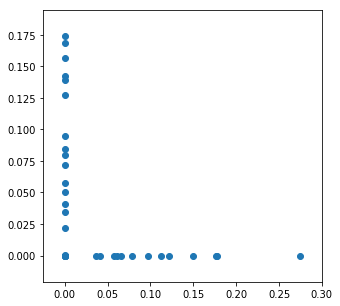

In [22]:
figure=plt.figure(figsize=(5,5))
ax=figure.add_subplot(111)
ax.scatter(feature_representations[:, 0], feature_representations[:, 1], cmap='Accent')
plt.show()

In [19]:
feature_representations[:, 0].shape

(34,)

In [18]:
feature_representations[:, 1].shape

(34,)